<a href="https://colab.research.google.com/github/IgorDBottero/Ocean_DeepLearning_09_02_2021/blob/main/Itroducaopython_Ocean_deeplearning_09_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import keras # Importa a biblioteca Keras
from keras.datasets import mnist # Base de Dados MNIST
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neura
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting)
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation)

In [6]:
#Carregando dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
print("quantidade de imgs para terino", len(x_treino))

print("quantidade de imgs para teste", len(x_teste))

print("tipo de x treino", type(x_treino))

primeira_imagem = x_treino[0]

representacao_primeira_imagem = y_treino[0]

print("a imagem é", representacao_primeira_imagem)

print("o formato dela é", primeira_imagem.shape)

print(primeira_imagem)


quantidade de imgs para terino 60000
quantidade de imgs para teste 10000
tipo de x treino <class 'numpy.ndarray'>
a imagem é 5
o formato dela é (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   

A imagem representa: 0


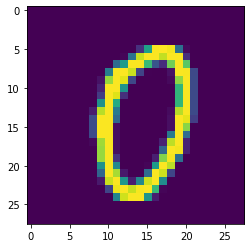

In [19]:
import matplotlib.pyplot as plt

indice = 1000

print("A imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice])

In [21]:
# Fluxo para construção de rede neural
# - Organizar a camada de entrada (input)
# - Organizar a camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões


In [23]:
# achatando a matriz de pixels e transformando em uma unica lista

quantidade_treino = len(x_treino) #60000
quantidade_teste = len(y_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28,28)

resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino_achatado = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste_achatatdo = x_teste.reshape(quantidade_teste, resolucao_total)

In [24]:
print("quantidade de itens em x_treino .achatado[0]", len(x_teste_achatatdo[0]))

print(x_teste_achatatdo[0])

quantidade de itens em x_treino .achatado[0] 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 222 254 254 254
 2